# Detecting the difficulty level of French texts




In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
! pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


In [ ]:
!python -m spacy download fr_core_news_sm

2023-11-20 15:40:46.965529: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 15:40:46.965595: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 15:40:46.965642: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 15:40:46.991120: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 15:40:52.356235: W tensorflow/compiler/

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c detecting-french-texts-difficulty-level-2023
from zipfile import ZipFile
with ZipFile('detecting-french-texts-difficulty-level-2023.zip','r') as zip:
  zip.extractall(path="")

  0% 0.00/303k [00:00<?, ?B/s]
100% 303k/303k [00:00<00:00, 69.9MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('training_data.csv', index_col = 'id')


In [ ]:
train_data.head()

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
train_data.isnull().sum()

sentence      0
difficulty    0
dtype: int64

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
X_data = train_data['sentence']

In [ ]:
y_data = train_data['difficulty']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [ ]:
y_train.shape

(3840,)

In [ ]:
X_train.shape

(3840,)

In [ ]:
import spacy
from spacy import displacy
import string
from nltk.stem.snowball import SnowballStemmer

In [ ]:
#french language
french = spacy.load('fr_core_news_sm')
stemmer = SnowballStemmer(language='french')

In [ ]:
test = "Bouygues a eu 1 coupure de réseau à Marseille."
test2 = "Par ailleurs, 42 % des adolescents déclarent qu'ils seraient dévastés s'ils devaient "

In [ ]:
def spacy_tokenizer(sentence):

    punctuations = string.punctuation
    stop_words = spacy.lang.fr.stop_words.STOP_WORDS

    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = french(sentence)

    # Remove proper nouns (noms propres)
    mytokens = [word for word in mytokens if word.pos_ != "PROPN"]

    # Lemmatize each token and convert each token into lowercase
    mytokens = [stemmer.stem(X.text) for X in mytokens]

    # Remove numbers
    mytokens = [word for word in mytokens if not word.isdigit()]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Remove anonymous dates and people
    mytokens = [ word.replace('xx/', '').replace('xxxx/', '').replace('xx', '') for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in ["xxxx", "xx", ""] ]
    # Return preprocessed list of tokens
    return list(mytokens)

In [ ]:
#spacy_tokenizer(test2)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#
## Définissez le vecteur TF-IDF avec votre fonction de tokenization
#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.90, norm='l2', encoding='latin-1', ngram_range=(1, 2), tokenizer=spacy_tokenizer)
#
## Définissez le classificateur LogisticRegression
#classifier = LogisticRegression()
#
## Créez le pipeline avec la normalisation
#pipe = Pipeline([
#    ('vectorizer', tfidf),
#    ('classifier', classifier)
#])
#
## Définissez les paramètres à tester pour LogisticRegression
#param_grid = {
#    'vectorizer__sublinear_tf': [True, False],
#    'classifier__C': [0.1, 1, 10],
#    'classifier__solver': ['lbfgs', 'liblinear'],
#    'classifier__max_iter': [100, 500, 1000]
#}
#
## Utilisez GridSearchCV pour tester différentes combinaisons de paramètres
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
#
## Ajustez le modèle sur l'ensemble d'entraînement avec la recherche par grille
#grid_search.fit(X_train['sentence'], y_train['difficulty'])
#
## Obtenez les meilleurs paramètres et le meilleur modèle
#best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_
#
## Faites des prédictions sur l'ensemble de test avec le meilleur modèle
#level_pred = best_model.predict(X_test['sentence'])
#
## Évaluez les performances du meilleur modèle
#accuracy = accuracy_score(y_test['difficulty'], level_pred)
#precision = precision_score(y_test['difficulty'], level_pred, average='macro')
#recall = recall_score(y_test['difficulty'], level_pred, average='macro')
#f1 = f1_score(y_test['difficulty'], level_pred, average='macro')
#
## Affichez les résultats
#print(f'The best parameters: {best_params}')
#print(f'The accuracy using TF-IDF and Logistic Regression is: {round(accuracy, 3)}')
#print(f'The precision using TF-IDF and Logistic Regression is: {round(precision, 3)}')
#print(f'The recall using TF-IDF and Logistic Regression is: {round(recall, 3)}')
#print(f'The F1-score using TF-IDF and Logistic Regression is: {round(f1, 3)}')
#

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.preprocessing import StandardScaler

# Définissez le vecteur TF-IDF avec votre fonction de tokenization
#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.90, norm='l2', encoding='latin-1', ngram_range=(1, 2), tokenizer=spacy_tokenizer)
#
## Ajoutez la normalisation avec StandardScaler
#classifier = LogisticRegression(solver='lbfgs', max_iter=100)

# Créez le pipeline avec la normalisation
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Ajustez le modèle sur l'ensemble d'entraînement
pipe.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
print(f'The accuracy using TF-IDF and MNB is: {round(accuracy_score(y_test, y_pred), 3)}')
#print(f'Accuracy of the best model: {accuracy_tfidf * 100:.2f}%')
print(f'\nThe precision using TF-IDF and MNB is: {round(precision_score(y_test, y_pred,average="macro"), 3)}')
print(f'\nThe recall using TF-IDF and MNB Regression is: {round(recall_score(y_test, y_pred,average="macro"), 3)}')
print(f'\nThe F1-score using TF-IDF and MNB is: {round(f1_score(y_test, y_pred,average="macro"), 3)}')


The accuracy using TF-IDF and MNB is: 0.454

The precision using TF-IDF and MNB is: 0.469

The recall using TF-IDF and MNB Regression is: 0.452

The F1-score using TF-IDF and MNB is: 0.451


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

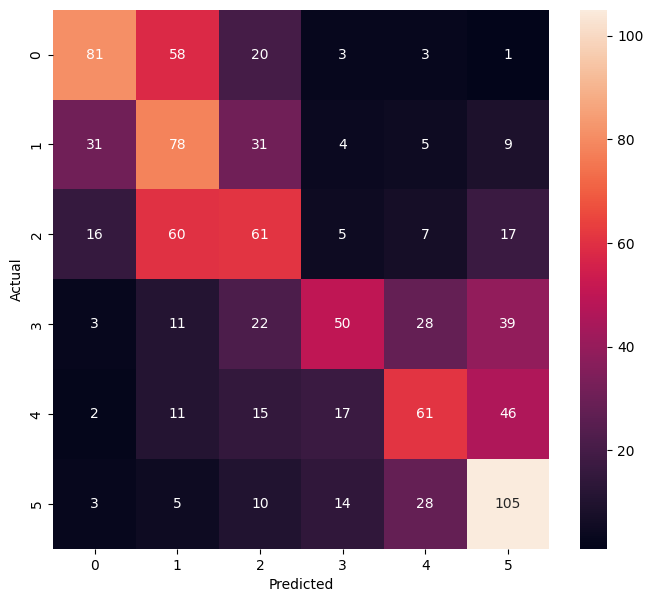

In [ ]:
## Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Train on full dataset

In [ ]:
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

In [ ]:
pipe.fit(X_full, y_full)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

# TEST DATA

In [ ]:
df_pred = pd.read_csv('unlabelled_test_data.csv', index_col = 'id')
df_pred.head()

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


In [ ]:
df_pred['difficulty'] = pipe.predict(df_pred["sentence"])
predictions = df_pred.drop(columns=['sentence'], inplace = False)
#predictions.set_index('id',inplace = True)

predictions.to_csv('submission.csv')

In [ ]:
predictions.head(2)

,difficulty
id,
0,C2
1,A2


In [ ]:
! kaggle competitions submit -c detecting-french-texts-difficulty-level-2023 -f submission.csv -m "Sample submission"

100% 8.30k/8.30k [00:01<00:00, 8.43kB/s]
Successfully submitted to Detecting the difficulty level of French texts